# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [ ]:
# Состоит из двух частей: заголовок файла и область данных. 
# В заголовке файла хранится информация о:
# Размере файла.
# Количестве каналов.
# Частоте дискретизации.
# Количестве бит в сэмпле.

In [33]:
import wave
wav = wave.open("C:/Users/Полина/DSP_Lab/Resources/dsp_lab1.wav", mode="r")
x = wav.getparams()
print(x)


_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=324507, comptype='NONE', compname='not compressed')


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [34]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [26]:
# Считывание файла 
samplerate, data = wavfile.read("C:/Users/Полина/DSP_Lab/Resources/dsp_lab1.wav")
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate
print(f"length = {length}s")


number of channels = 2
length = 7.35843537414966s


In [51]:
def playgraf(data):
    time = np.linspace(0., length, data.shape[0])
    plt.plot(time, data[:, 1], color='r')
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

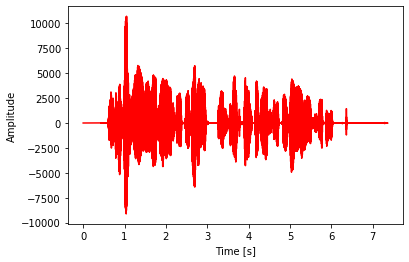

In [52]:
# Графики формы волны файла
playgraf(data)

In [50]:
#Воспроизведение сигнала с правильной частотой дискретизации
sr = 44100
IPython.display.Audio("C:/Users/Полина/DSP_Lab/Resources/dsp_lab1.wav", rate=sr)

In [54]:
# Изменение частоты дискретизации 
#Воспроизведение сигнала с некорректной частотой дискретизации (меньше)
sr_false = [30000,20000,10000,5000,1000]
IPython.display.Audio(data[:, 1], rate=sr_false[0])

In [55]:
IPython.display.Audio(data[:, 1], rate=sr_false[1])

In [58]:
IPython.display.Audio(data[:, 1], rate=sr_false[2])

In [65]:
IPython.display.Audio(data[:, 1], rate=140000)

На этом моменте невозможно разобрать слова при уменьшении частоты дискретизации

In [ ]:
# При какой частоте дискретизации становится невозможно разобрать человеческую речь?
# Ответ: min 10000, max 14000

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

mp3 - запись звука со сжатием
ogg - универсален для аудио, видео или других данных

wav - не сжимает, поэтому лучше качество звука, но больше весит 

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [72]:
import math

In [66]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [67]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

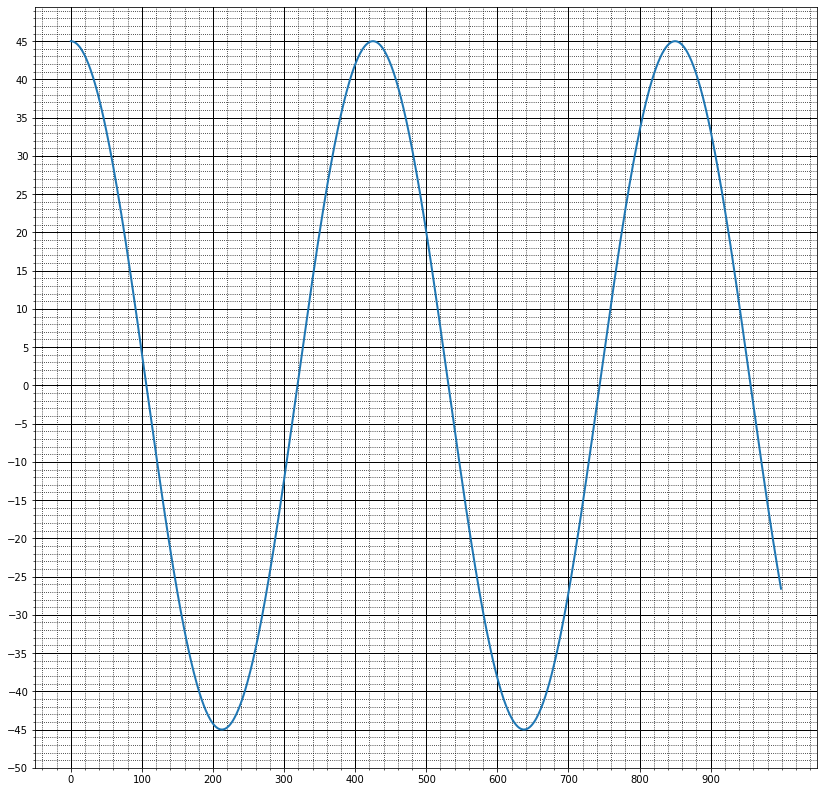

In [68]:
draw_signal(test_data['task2']['a'])

In [130]:
# Y = 𝐴cos(𝜔𝑡+𝜑0)
amp = 45
w = 425
fi=0
a = np.asarray([amp*math.cos(((2*math.pi)/w)*t+fi) for t in range(1000)])

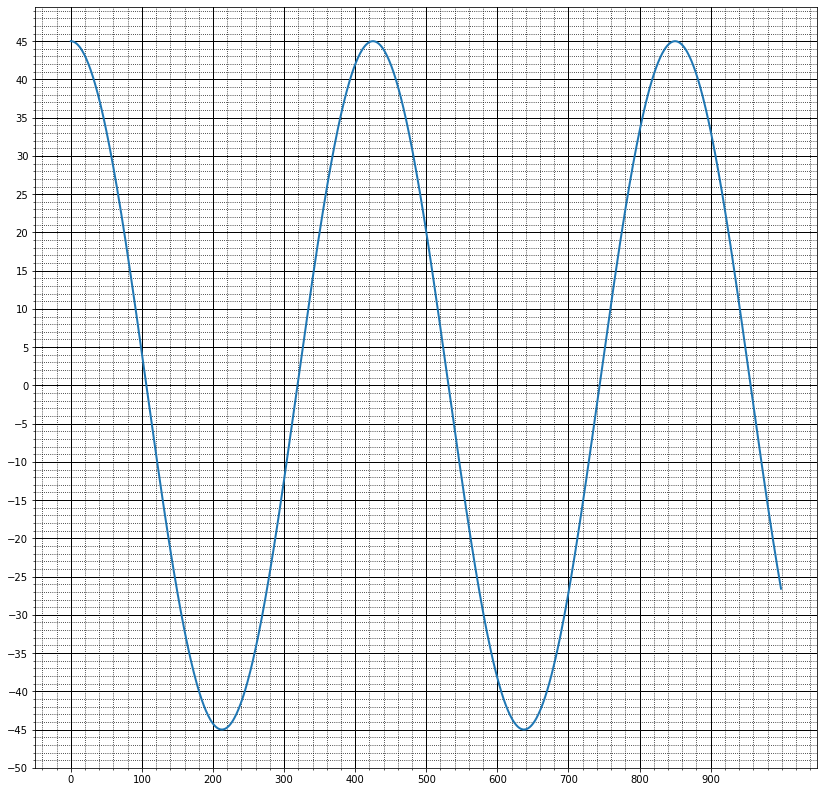

In [131]:
draw_signal(a)

In [132]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $45

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $0.015

3. Фаза - $\phi= $0

### Сигнал ***b***

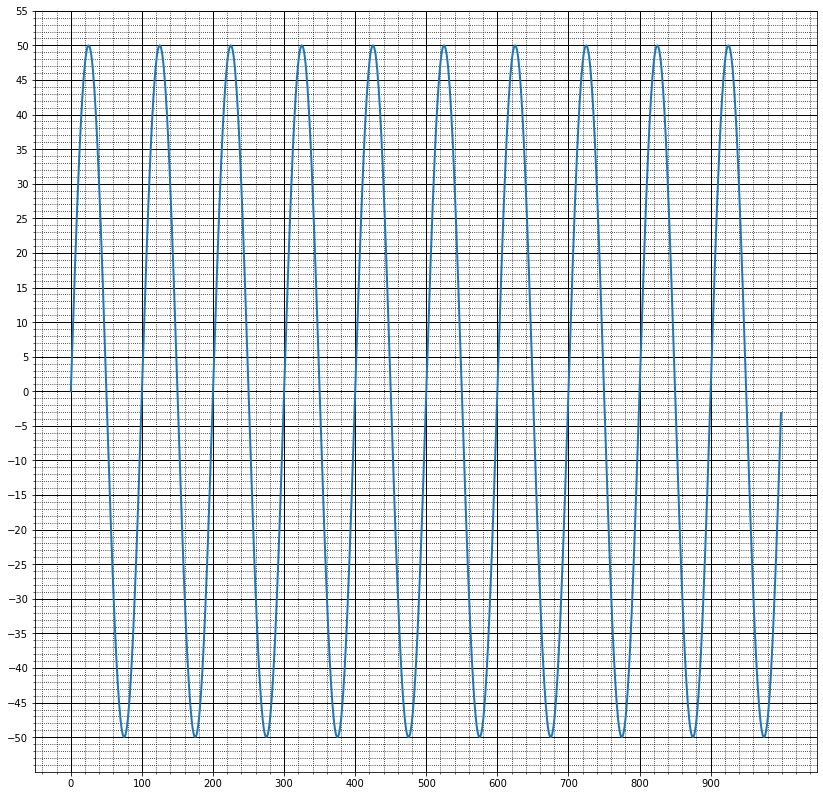

In [69]:
draw_signal(test_data['task2']['b'])

In [205]:
# YOUR CODE HERE
amp = 50
w = 100
fi=-math.radians(90)
b = np.asarray([amp*math.cos(((2*math.pi)/w)*t+fi) for t in range(1000)])

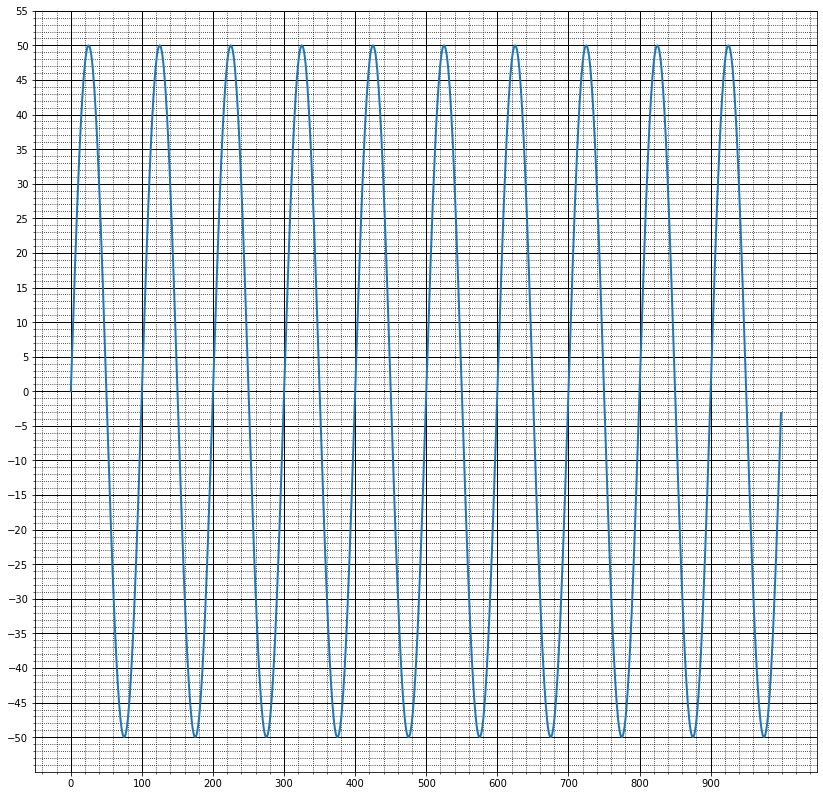

In [206]:
draw_signal(b)

In [207]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $50

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $100

3. Фаза - $\phi= $-90 градусов

### Сигнал ***c***

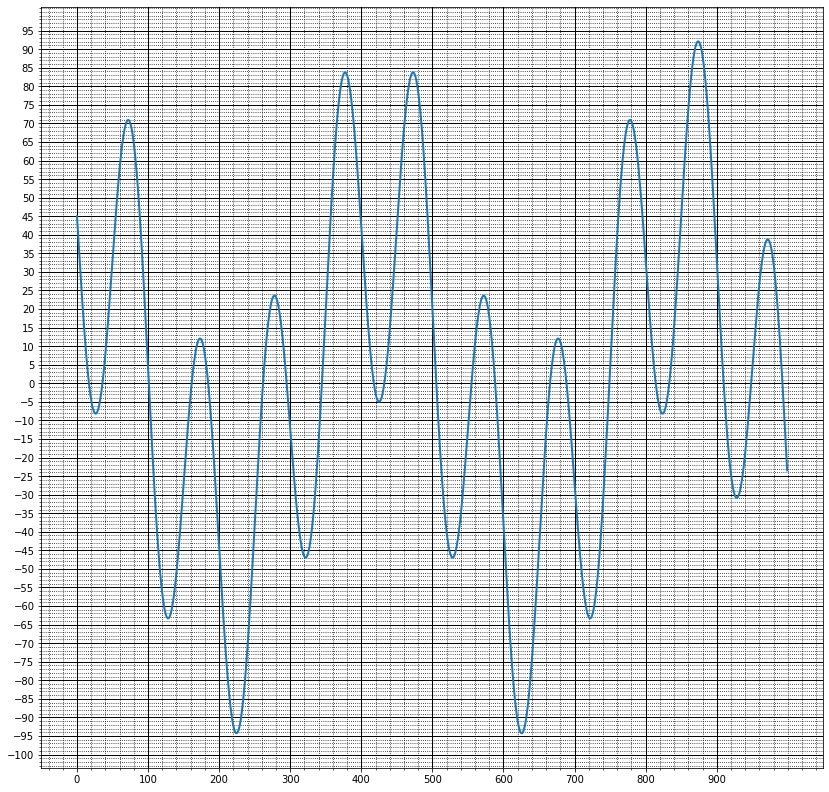

In [70]:
draw_signal(test_data['task2']['c'])

In [364]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
amp1 = 50
w1 = 100
fi1=math.radians(90)
amp = 45
w = 425
fi=0
с = np.asarray([((amp1*math.cos(((2*math.pi)/w1)*t+fi1)) + (amp*math.cos(((2*math.pi)/w)*t+fi))) for t in range(1000)])

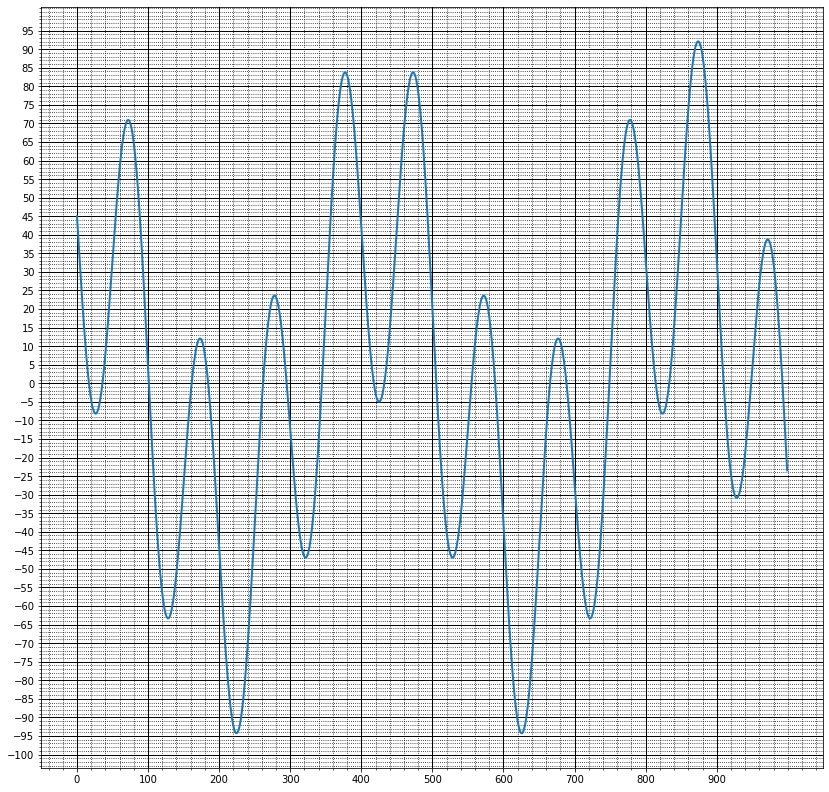

In [365]:
draw_signal(с)

In [366]:
assert len(с)== 1000
assert np.allclose(с, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [404]:
from scipy import signal

In [399]:
def convolve(in1, in2):
    if (len(in2) > len(in1)):
        in1, in2 = in2, in1
    if len(in1) == 0:
        raise ValueError('in1 cannot be empty')
    if len(in2) == 0:
        raise ValueError('in2 cannot be empty')

    return np.correlate(in1, in2[::-1], mode="full")

In [405]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    print(my_result)
    scipy_result = signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [406]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [407]:
test_convolve(a, b, print_debug=False)

[0 0 0 0 0 0 0 0 0 0 0 1 3 6 8 9 9 9 9 9 9 8 6 3 1 0 0 0 0 0 0 0 0 0 0 0]
Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

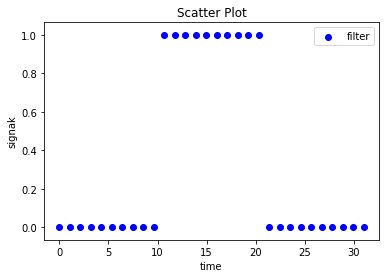

In [414]:
# YOUR CODE 
plt.scatter(np.linspace(0, len(a)+1, len(a)), a, label='filter', color='b')    
plt.xlabel('time')   
plt.ylabel('signak')   
plt.title('Scatter Plot')   
plt.legend()   
plt.show()   

Сигнал **b**

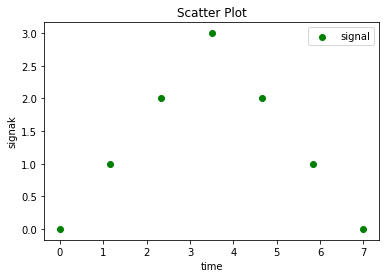

In [415]:
# YOUR CODE HERE
plt.scatter(np.linspace(0, len(b), len(b)), b, label='signal', color='g')    
plt.xlabel('time')   
plt.ylabel('signak')   
plt.title('Scatter Plot')   
plt.legend()   
plt.show()  

Свертка **a** и **b**

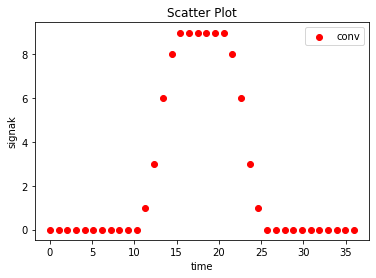

In [416]:
plt.scatter(np.linspace(0, len(my_result), len(my_result)), my_result, label='conv', color='r')    
plt.xlabel('time')   
plt.ylabel('signak')   
plt.title('Scatter Plot')   
plt.legend()   
plt.show()  

Все 3 графика на одной картинке:

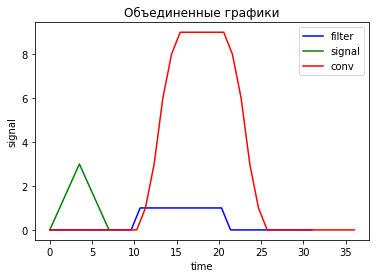

In [420]:
plt.plot(np.linspace(0, len(a)+1, len(a)), a, label='filter', color='b')    
plt.plot(np.linspace(0, len(b), len(b)), b, label='signal', color='g')    
plt.plot(np.linspace(0, len(my_result), len(my_result)), my_result, label='conv', color='r')    
plt.xlabel('time')   
plt.ylabel('signal')   
plt.title('Объединенные графики')   
plt.legend()   
plt.show()# YOUR CODE HERE